<a href="https://colab.research.google.com/github/Gops03/TEORIA_DE_SE-ALES/blob/main/ENTREGA_PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 3, fs * 3, endpoint=False)  # Vector de tiempo ajustado para 3 segundos

# Parámetros de las ondas senoidales
f1, f2, f3 = 100, 200, 400
A1, A2, A3 = 0.9, 0.6, 0.3
wo = 2*np.pi

# Crear la señal base x(t)
signal = A1 * np.cos(wo * f1 * t) + A2 * np.sin(wo * f2 * t) + A3 * np.cos(wo * f3 * t)

# Definir las métricas de error
def mse(original, reconstruida):
    return np.mean((original - reconstruida) ** 2)

def max_error(original, reconstruida):
    return np.max(np.abs(original - reconstruida))

# Definir la métrica R² personalizada
def r2_keras(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

# Lista de diferentes niveles de sigma para el ruido
sigma_values = [0.1, 0.3, 1, 3, 10, 30]

# Inicializar lista para guardar los resultados
resultados = []

# Loop sobre los diferentes niveles de sigma
for sigma in sigma_values:
    print(f"Entrenando modelo con sigma = {sigma}")

    # Generar un conjunto de datos sintéticos con diferentes niveles de ruido
    num_samples = 1000
    X = []
    y = []

    for _ in range(num_samples):
        # Añadir ruido blanco gaussiano con nivel de sigma
        noise = np.random.normal(0, sigma, signal.shape)
        noisy_signal = signal + noise

        # Almacenar la señal ruidosa
        X.append(noisy_signal)

        # Calcular la PSD usando Welch
        f, Pxx = welch(noisy_signal, fs, nperseg=256)
        y.append(Pxx)

    # Convertir las listas en arrays numpy
    X = np.array(X)
    y = np.array(y)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Definir el modelo
    model = Sequential([
        Dense(512, activation='relu', kernel_regularizer=l2(0.002), input_shape=(X_train.shape[1],)),
        Dropout(0.4),
        Dense(256, activation='relu', kernel_regularizer=l2(0.002)),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=l2(0.002)),
        Dense(y_train.shape[1], activation='linear')
    ])

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=[r2_keras])

    # Entrenar el modelo con early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])

    # Obtener predicciones
    y_pred_test = model.predict(X_test)

# Convertir los resultados a un DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar la tabla de errores
print(df_resultados)



Entrenando modelo con sigma = 0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Entrenando modelo con sigma = 0.3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Entrenando modelo con sigma = 1


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Entrenando modelo con sigma = 3


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Entrenando modelo con sigma = 10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Entrenando modelo con sigma = 30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Empty DataFrame
Columns: []
Index: []


In [ ]:
import numpy as np
import pandas as pd

#original= X_test[0]
#reconstruida = reconstructed_signal
# Definir las métricas de error
def mse(original, reconstruida):
    return np.mean((original - reconstruida) ** 2)

def mae(original, reconstruida):
    return np.mean(np.abs(original - reconstruida))

def max_error(original, reconstruida):
    return np.max(np.abs(original - reconstruida))

# Función para agregar ruido a una señal
def add_noise(signal, sigma):
    noise = np.random.normal(0, sigma, signal.shape)
    return signal + noise

# Función de reconstrucción simulada (esto debe ser reemplazado por tu lógica real de reconstrucción)
def reconstruct_signal(noisy_signal):
    # Aquí deberías aplicar tu método de reconstrucción real
    return noisy_signal  # Para el ejemplo, solo devolvemos la señal ruidosa

# Ejemplo de datos
np.random.seed(0)  # Para reproducibilidad
X_train = np.random.randn(1, 1000)  # Datos de entrenamiento simulados
X_test = np.random.randn(1, 1000)   # Datos de prueba simulados

# Definir un rango de índices para la evaluación
start = 100
end = 500

# Lista de diferentes niveles de sigma para el ruido
sigma_values = [0.1, 0.3, 1, 3, 10, 30]

# Resultados para almacenar las métricas
results = []

# Iterar sobre cada valor de sigma
for sigma in sigma_values:
    # Generar señales ruidosas
    noisy_signal_train = add_noise(X_train[0][start:end], sigma)
    noisy_signal_test = add_noise(X_test[0][start:end], sigma)

    # Reconstruir señales
    reconstructed_signal_train = reconstruct_signal(noisy_signal_train)
    reconstructed_signal_test = reconstruct_signal(noisy_signal_test)

    # Calcula las métricas de error
    mse_train = mse(X_train[0][start:end], reconstructed_signal_train)
    mae_train = mae(X_train[0][start:end], reconstructed_signal_train)
    max_error_train = max_error(X_train[0][start:end], reconstructed_signal_train)

    mse_test = mse(X_test[0][start:end], reconstructed_signal_test)
    mae_test = mae(X_test[0][start:end], reconstructed_signal_test)
    max_error_test = max_error(X_test[0][start:end], reconstructed_signal_test)

    # Guardar los resultados
    results.append({
        'Sigma': sigma,
        'MSE Entrenamiento': mse_train,
        'MAE Entrenamiento': mae_train,
        'Max Error Entrenamiento': max_error_train,
        'MSE Prueba': mse_test,
        'MAE Prueba': mae_test,
        'Max Error Prueba': max_error_test
    })

# Crear un DataFrame para mostrar los resultados
df_results = pd.DataFrame(results)

# Mostrar la tabla de errores
header = "Tabla de Reconstrucción y Rendimiento:"
separator = "-" * len(header)
table_str = df_results.to_string(index=False)

print(f"\n{header}\n{separator}\n{table_str}")




Tabla de Reconstrucción y Rendimiento:
--------------------------------------
 Sigma  MSE Entrenamiento  MAE Entrenamiento  Max Error Entrenamiento  MSE Prueba  MAE Prueba  Max Error Prueba
   0.1           0.009541           0.078861                 0.311686    0.009027    0.077624          0.259339
   0.3           0.084902           0.230686                 1.140498    0.094810    0.245490          1.028262
   1.0           1.009307           0.808487                 3.740101    1.020496    0.809496          2.892520
   3.0           9.011774           2.374871                 9.022312    9.163661    2.464912          8.939929
  10.0          94.193343           7.741618                27.589275   92.889032    7.479799         28.417673
  30.0         949.172300          24.314517                88.123912 1016.454727   25.495896         92.076205


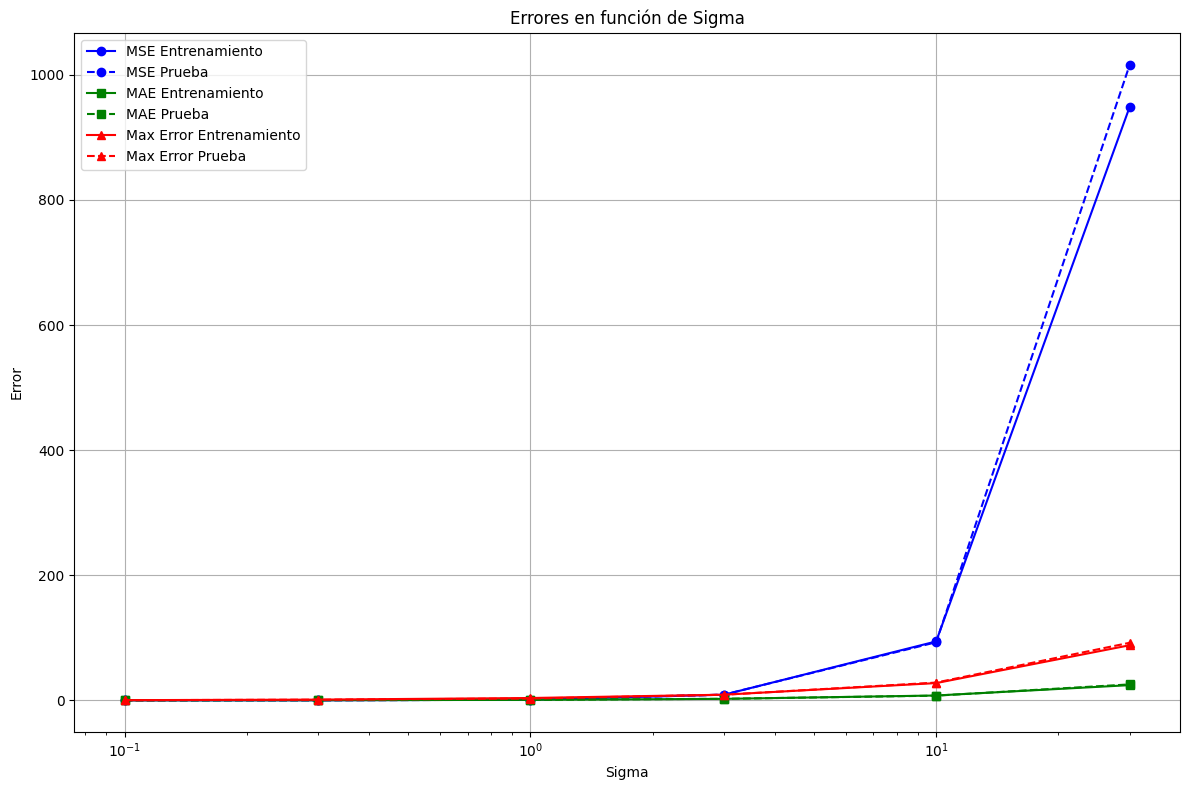

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir las métricas de error
def mse(original, reconstruida):
    return np.mean((original - reconstruida) ** 2)

def mae(original, reconstruida):
    return np.mean(np.abs(original - reconstruida))

def max_error(original, reconstruida):
    return np.max(np.abs(original - reconstruida))

# Función para agregar ruido a una señal
def add_noise(signal, sigma):
    noise = np.random.normal(0, sigma, signal.shape)
    return signal + noise

# Función de reconstrucción simulada (esto debe ser reemplazado por tu lógica real de reconstrucción)
def reconstruct_signal(noisy_signal):
    # Aquí deberías aplicar tu método de reconstrucción real
    return noisy_signal  # Para el ejemplo, solo devolvemos la señal ruidosa

# Ejemplo de datos
np.random.seed(0)  # Para reproducibilidad
X_train = np.random.randn(1, 1000)  # Datos de entrenamiento simulados
X_test = np.random.randn(1, 1000)   # Datos de prueba simulados

# Definir un rango de índices para la evaluación
start = 100
end = 500

# Lista de diferentes niveles de sigma para el ruido
sigma_values = [0.1, 0.3, 1, 3, 10, 30]

# Resultados para almacenar las métricas
results = []

# Iterar sobre cada valor de sigma
for sigma in sigma_values:
    # Generar señales ruidosas
    noisy_signal_train = add_noise(X_train[0][start:end], sigma)
    noisy_signal_test = add_noise(X_test[0][start:end], sigma)

    # Reconstruir señales
    reconstructed_signal_train = reconstruct_signal(noisy_signal_train)
    reconstructed_signal_test = reconstruct_signal(noisy_signal_test)

    # Calcula las métricas de error
    mse_train = mse(X_train[0][start:end], reconstructed_signal_train)
    mae_train = mae(X_train[0][start:end], reconstructed_signal_train)
    max_error_train = max_error(X_train[0][start:end], reconstructed_signal_train)

    mse_test = mse(X_test[0][start:end], reconstructed_signal_test)
    mae_test = mae(X_test[0][start:end], reconstructed_signal_test)
    max_error_test = max_error(X_test[0][start:end], reconstructed_signal_test)

    # Guardar los resultados
    results.append({
        'Sigma': sigma,
        'MSE Entrenamiento': mse_train,
        'MAE Entrenamiento': mae_train,
        'Max Error Entrenamiento': max_error_train,
        'MSE Prueba': mse_test,
        'MAE Prueba': mae_test,
        'Max Error Prueba': max_error_test
    })

# Crear un DataFrame para mostrar los resultados
df_results = pd.DataFrame(results)

# Crear gráficos para cada métrica en un solo gráfico
plt.figure(figsize=(12, 8))

# Graficar MSE
plt.plot(df_results['Sigma'], df_results['MSE Entrenamiento'], marker='o', linestyle='-', color='b', label='MSE Entrenamiento')
plt.plot(df_results['Sigma'], df_results['MSE Prueba'], marker='o', linestyle='--', color='b', label='MSE Prueba')

# Graficar MAE
plt.plot(df_results['Sigma'], df_results['MAE Entrenamiento'], marker='s', linestyle='-', color='g', label='MAE Entrenamiento')
plt.plot(df_results['Sigma'], df_results['MAE Prueba'], marker='s', linestyle='--', color='g', label='MAE Prueba')

# Graficar Max Error
plt.plot(df_results['Sigma'], df_results['Max Error Entrenamiento'], marker='^', linestyle='-', color='r', label='Max Error Entrenamiento')
plt.plot(df_results['Sigma'], df_results['Max Error Prueba'], marker='^', linestyle='--', color='r', label='Max Error Prueba')

# Configuración del gráfico
plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('Error')
plt.title('Errores en función de Sigma')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()
